# SMS Spam Classifier using Machine Learning

## Workflow of model

- Data Preprocessing
- EDA
- Text Preprocessing
- Model Building
- Model Evaluation
- Improvement
- Website
- Deploy

In [147]:
# importing dependencies

import numpy as np
import pandas as pd
import chardet
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import string
nltk.download('stopwords')
from nltk.corpus import stopwords           # for removing stopwords
from nltk.stem.porter import PorterStemmer  # for stemming of text
from wordcloud import WordCloud            # for wordcloud diagram



from sklearn.preprocessing import LabelEncoder


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [109]:
with open('spam.csv', 'rb') as f: result = chardet.detect(f.read())
encoding = result['encoding']
df = pd.read_csv('spam.csv', encoding=encoding , delimiter=",")


# df = pd.read_csv('spam.csv')
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
4931,ham,Match started.india &lt;#&gt; for 2,NaN,NaN,NaN
1051,ham,Do u noe wat time e place dat sells 4d closes?,NaN,NaN,NaN
2432,ham,Really dun bluff me leh... U sleep early too. ...,NaN,NaN,NaN
1415,ham,Jay is snickering and tells me that x is total...,NaN,NaN,NaN
3533,ham,Good evening! How are you?,NaN,NaN,NaN


In [110]:
df.shape

(5572, 5)

In [111]:
# renaming the columns

df.rename(columns= {'v1':'target', 'v2' : 'text'}, inplace = True)
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [112]:
# columns

df.columns

Index(['target', 'text', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [113]:
# using label encoder for ham/spam

encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])

In [114]:
df.head()

,target,text,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [115]:
# checking for null values

df.isnull().sum()

target           0
text             0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [116]:
# checking for duplicate values

df.dropna(axis = 1, inplace = True)
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [117]:
# finding spam and ham counts

df['target'].value_counts()

0    4825
1     747
Name: target, dtype: int64

<Axes: xlabel='target', ylabel='count'>

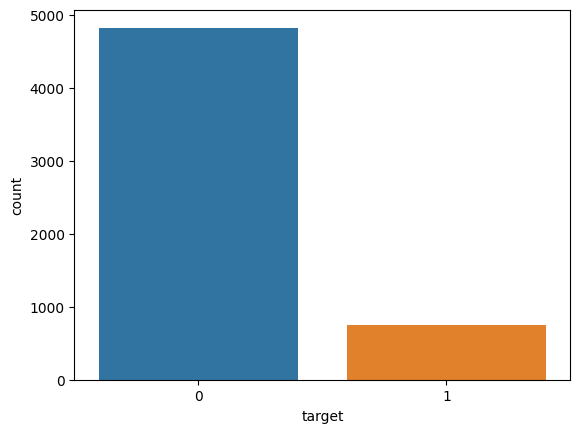

In [118]:
sns.countplot(x=df["target"])

# distribution of target

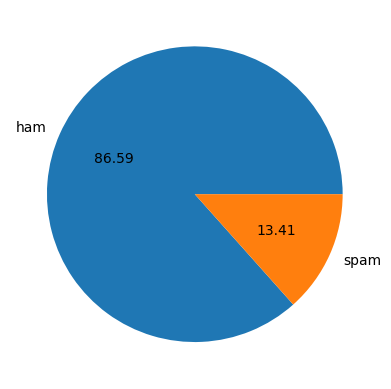

In [119]:
plt.pie(df['target'].value_counts(), labels = ['ham', 'spam'], autopct = "%0.2f")
plt.show()

In [120]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [121]:
df['characters']= df['text'].apply(len)
# calculating number of char in a text and inserting it to new column called characters

In [122]:
df.head()

,target,text,characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [123]:
# counting the  number of words
df['words'] = df['text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [124]:
df.head()

,target,text,characters,words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [125]:
# counting the  number of sentences
df['sentences'] = df['text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [126]:
df.head()

,target,text,characters,words,sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [127]:
df.describe()

,target,characters,words,sentences
count,5572.000000,5572.000000,5572.000000,5572.000000
mean,0.134063,80.118808,18.699390,1.996411
std,0.340751,59.690841,13.741932,1.520159
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,61.000000,15.000000,1.500000
75%,0.000000,121.000000,27.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


In [128]:
# describing ham messages

df[df['target'] == 0][['characters', 'words', 'sentences']].describe()

,characters,words,sentences
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [129]:
# describing ham messages

df[df['target'] == 1][['characters', 'words', 'sentences']].describe()

,characters,words,sentences
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='characters', ylabel='Count'>

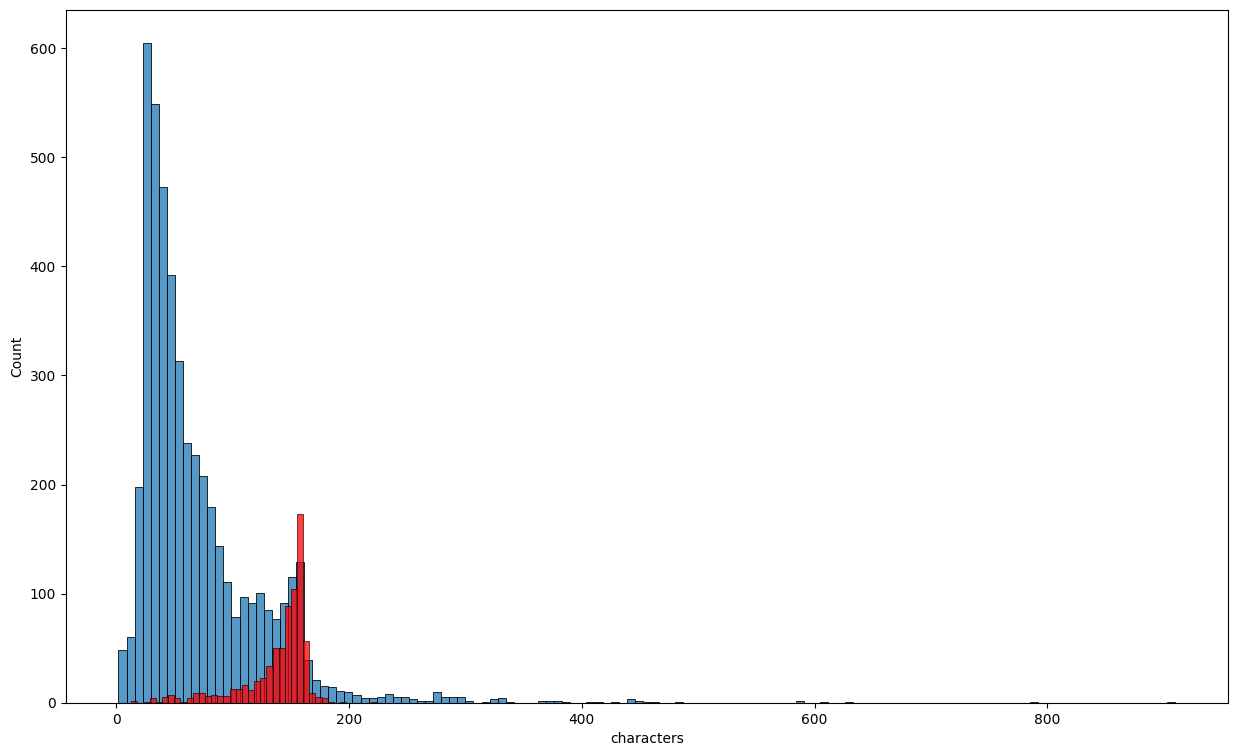

In [130]:
plt.figure(figsize = (15, 9))
sns.histplot(df[df['target'] == 0]['characters'])
sns.histplot(df[df['target'] == 1]['characters'], color = 'red')

<Axes: xlabel='words', ylabel='Count'>

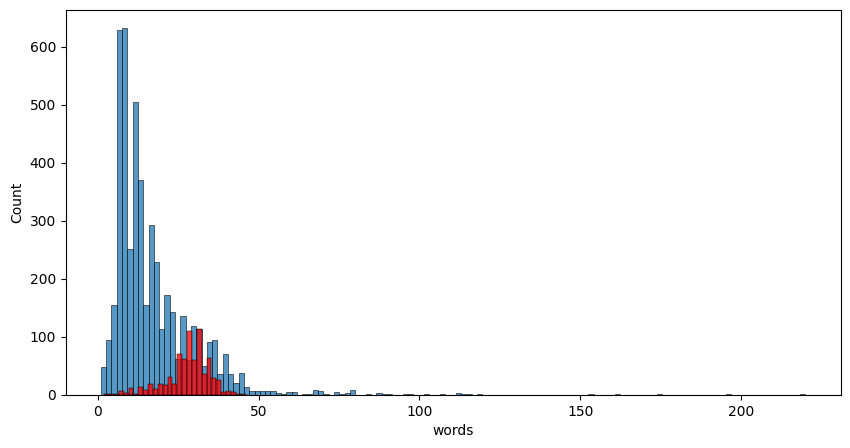

In [131]:
plt.figure(figsize = (10, 5))

sns.histplot(df[df['target'] == 0]['words'])
sns.histplot(df[df['target'] == 1]['words'], color = 'red')

<Axes: xlabel='sentences', ylabel='Count'>

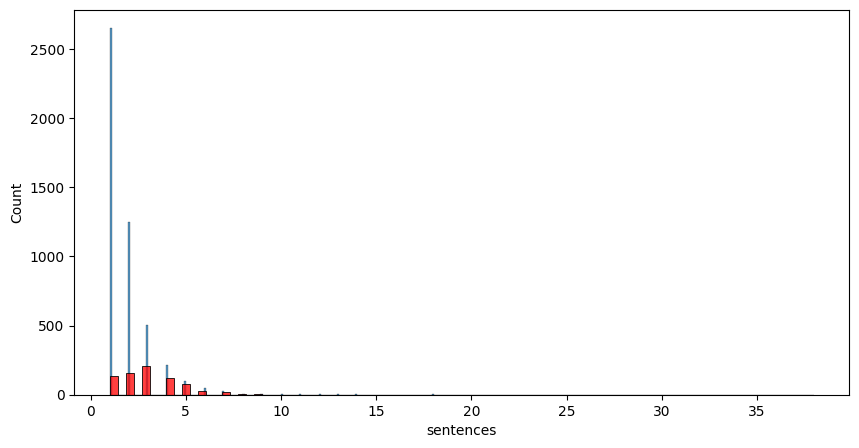

In [132]:
plt.figure(figsize = (10, 5))

sns.histplot(df[df['target'] == 0]['sentences'])
sns.histplot(df[df['target'] == 1]['sentences'], color = 'red')

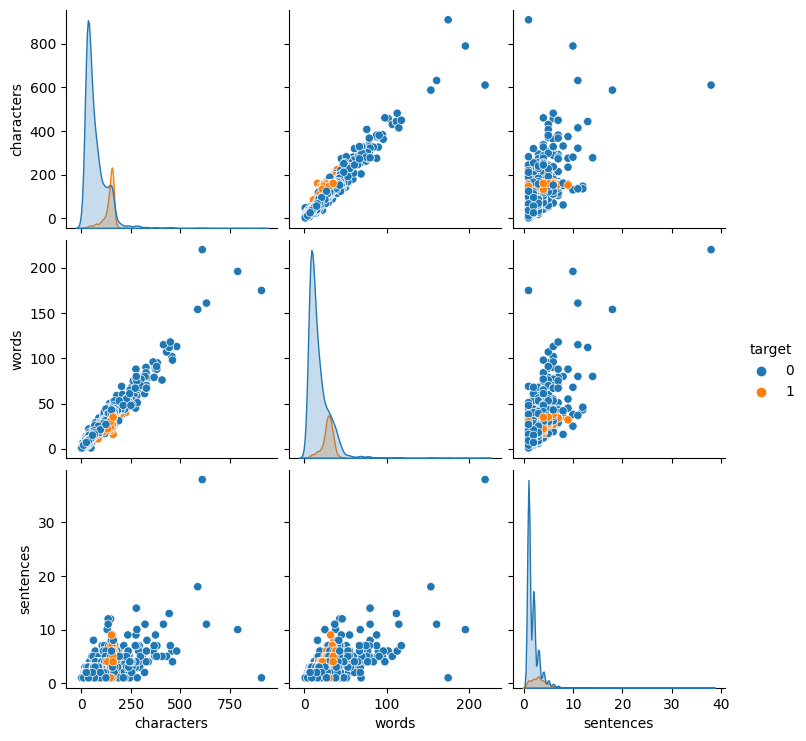

In [133]:
# pairplot

sns.pairplot(df, hue = 'target')

<ipython-input-134-311b1c932a48>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot = True)


<Axes: >

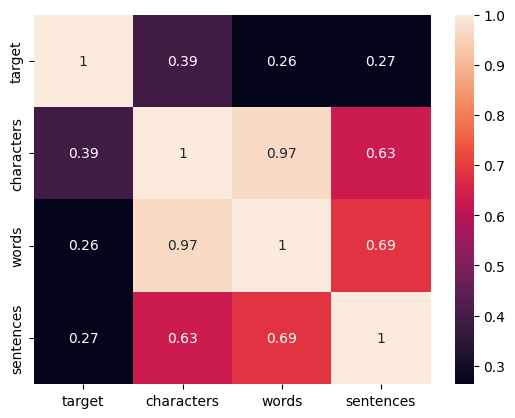

In [134]:
# heatmap of correlation of columns

sns.heatmap(df.corr(), annot = True)

## Text Preprocessing

Steps
  - Make text lower casee
  - Tokenizatin
  - Removing special characters
  - Removing stop words and punctuation
  - Stemming

In [135]:
df.columns

Index(['target', 'text', 'characters', 'words', 'sentences'], dtype='object')

In [136]:
ps = PorterStemmer()

def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    if i not in stopwords.words('english') and i not in string.punctuation:
      y.append(i)
  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))

  return " ".join(y)


In [137]:
def transform_text_with_stopwords(text):
  text = text.lower()
  text = nltk.word_tokenize(text)
  y = []
  for i in text:
    if i.isalnum():
      y.append(i)
  return y

In [138]:
print(transform_text_with_stopwords('HII MY NAME IS ANKIT NAINWAL Hii how are you I AM GOOD &#(*#$ #&&@*#* YOU KNOW ))'))
print(transform_text('HIIiiii  NAM IS ANKIT NAINWAL telling, however, something about yourself I AM GOOD &#(*#$ &@*#* YOU KNOW )) I am going to learning for understanding,for doing something'))

['hii', 'my', 'name', 'is', 'ankit', 'nainwal', 'hii', 'how', 'are', 'you', 'i', 'am', 'good', 'you', 'know']
hiiiiii nam ankit nainwal tell howev someth good know go learn understand someth


In [139]:
# # removing special characters
# def remove_sepcial(text):
#   y = []
#   for i in text:
#     if i.isalnum():
#       y.append(i)
#   return y

In [140]:
# list of stopwords

print(stopwords.words('english'))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [141]:
print(transform_text(df['text'][0]))
print(transform_text(df['text'][1]))
print(transform_text(df['text'][10]))

go jurong point crazi avail bugi n great world la e buffet cine got amor wat
ok lar joke wif u oni
gon na home soon want talk stuff anymor tonight k cri enough today


In [155]:
# create new column for storing transformed text of dataset

df['transformed_text'] = df['text'].apply(transform_text)

In [156]:
df.head()

,target,text,characters,words,sentences,transfomed text,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though,nah think goe usf live around though


In [171]:
wc = WordCloud(width = 700, height = 700, min_font_size = 10, background_color= 'grey')

In [172]:
# wordcloud for spam messages

spam_wordcloud = wc.generate(df[df['target']==1]['transformed_text'].str.cat(sep=" "))

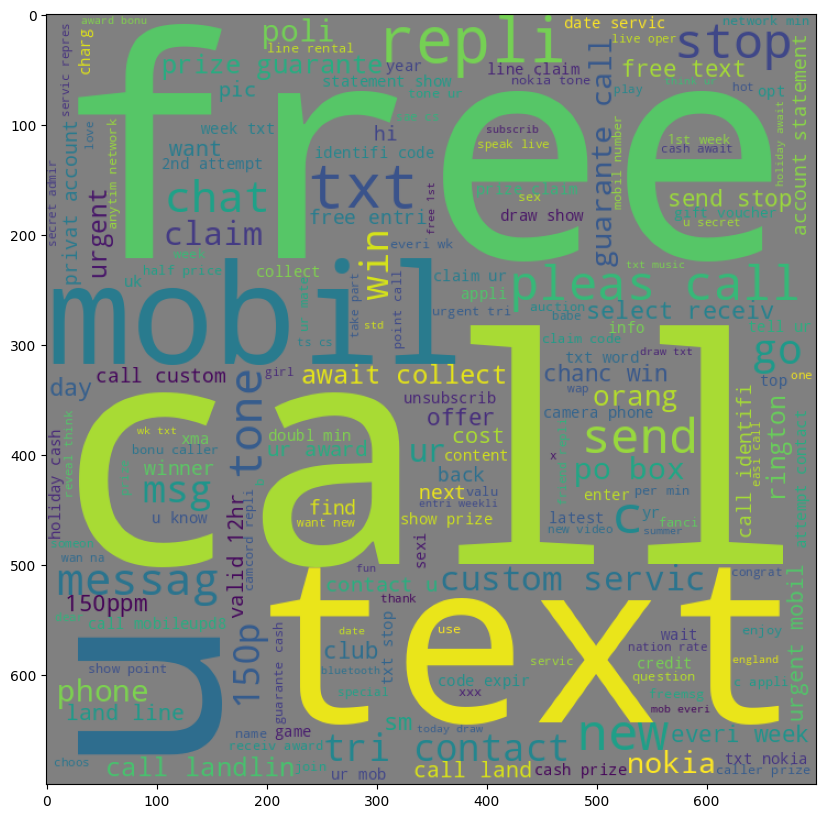

In [173]:
plt.figure(figsize=(16,10))
plt.imshow(spam_wordcloud)

In [174]:
# wordcloud for Ham messages

ham_wordcloud = wc.generate(df[df['target']==0]['transformed_text'].str.cat(sep=" "))

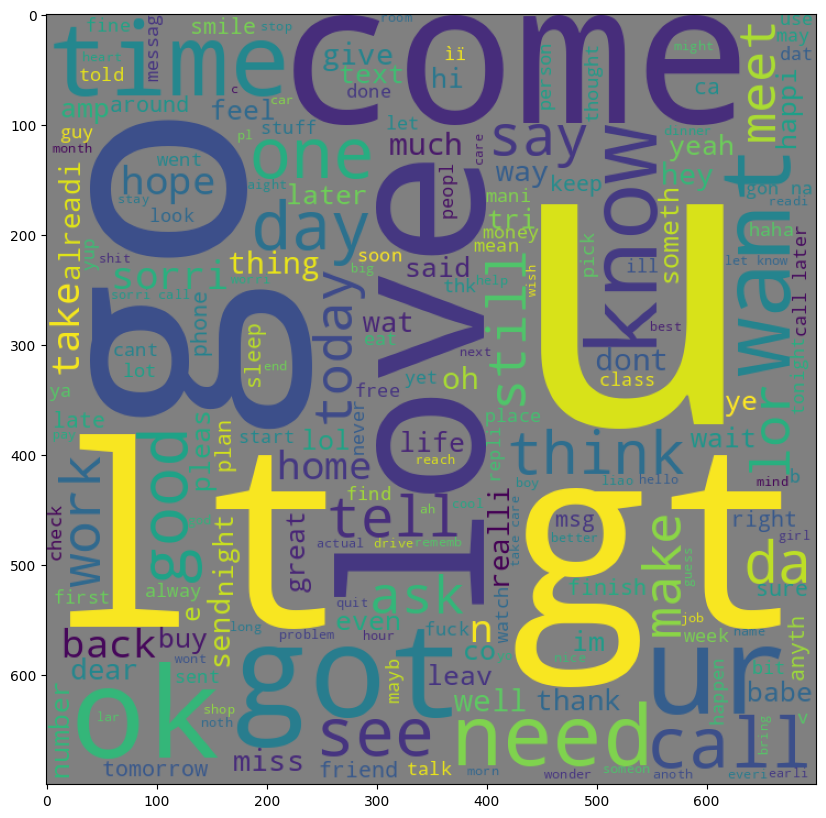

In [175]:
plt.figure(figsize=(16,10))
plt.imshow(ham_wordcloud)